In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib as mpl  # to visualize data
import seaborn as sns # to visualize data
import matplotlib.colors as mcolors # to visualize colors
import string # collection of alphabets, words or other characters
import re # regular expression support
import nltk 
nltk.download('stopwords')
from sklearn.metrics import *

# import gensim # representing documents as semantic vectors

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/I570078/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pd.set_option('display.max_colwidth', None)

## Vader without Text-Pre-Edditing

In [3]:
df_vader_with_stopwords = pd.read_csv('../../Data-Preparation/testdata_with_stopwords_preprocessed.csv')

In [4]:
df_vader_with_stopwords['target'].value_counts()

target
0    160000
4    160000
Name: count, dtype: int64

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [6]:
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.00:
        return 'positive'
    else: 
        return 'negative'

In [7]:
df_vader_with_stopwords['VADER_Classification'] = df_vader_with_stopwords['Text'].apply(classify_sentiment)

In [8]:
df_vader_with_stopwords

,Text,target,Ground_Truth_Label,VADER_Classification
0,would like to have even a little bit of time off work. Laying out until 11:30 then work 12:30-8:30.,0,negative,positive
1,Looking forward to keeping in touch with Naomi.. It has been a long time since we chatted!,4,positive,positive
2,"@NBATVAndre No, in Germany the NBA has no airtime . But I got the International LP so I will watch the game for sure.",0,negative,positive
3,"@AliChemist Your future self's in trouble, then! My favourite Bagley is probably Running Blind, in Iceland. Terrific.",4,positive,negative
4,@remco_dekker did you know there is a reason why Opera is only popular the mobile platform..? It's because Firefox rocks its ass!,4,positive,negative
...,...,...,...,...
319995,@ttmhand ???????,4,positive,positive
319996,had no idea on what to wear tomorrow !,0,negative,negative
319997,@sweet_pea00 darn i will think of you on our journey so it's like you are really there,0,negative,positive
319998,"oh my, Calvin Harris called me a DAFT BASTARD. I feel so cool, this is my new claim to fame.",4,positive,positive


In [9]:
accuracy = accuracy_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.66650625


In [10]:
accuracy = accuracy_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'])
precision = precision_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')
recall = recall_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')
f1 = f1_score(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], pos_label='positive')


In [11]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.67
Precision: 0.61
Recall: 0.90
F1 Score: 0.73


In [12]:
print("\nClassification Report:\n")
print(classification_report(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.81      0.43      0.56    160000
    positive       0.61      0.90      0.73    160000

    accuracy                           0.67    320000
   macro avg       0.71      0.67      0.65    320000
weighted avg       0.71      0.67      0.65    320000



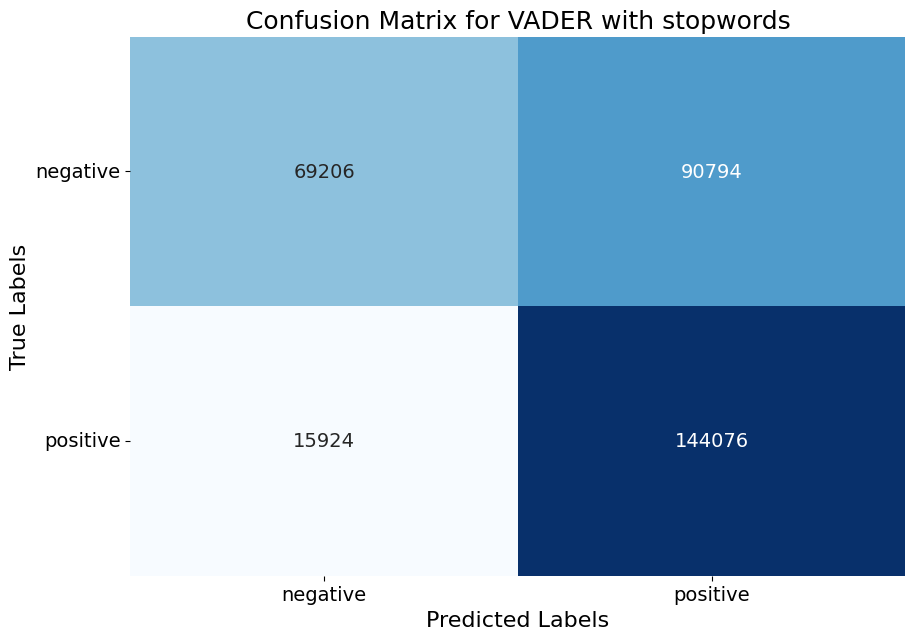

In [13]:
cm_nb = confusion_matrix(df_vader_with_stopwords['Ground_Truth_Label'], df_vader_with_stopwords['VADER_Classification'])


# Erstellen der Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for VADER with stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()